In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Jun 30 02:12:29 2019

@author: Mithilesh
"""

""" 1- Imported cv2 to read the image and also to convert the image from BGR to RGB.
    2- Numpy is imported in order to do mathematical stuffs.
    3- Matplotlib.pyplot is imported to draw the image .
    4- KMeans is imported to perform KMeans-Clusterring. """
    
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

plt.style.use("default")

class Segmentation:
    
    def __init__(self,image,dom_colors):
        #since cv2 reads image in BGR mode , it is necessary to convert into RGB mode.
        self.image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        self.orginal_size=image.shape
        #flatenning the image in order to make it compatible for KMeans class
        self.pixel_array=self.image.reshape((-1,3))
        self.dom_colors=dom_colors
        #Created an instance of KMeans 
        self.km=KMeans(n_clusters=self.dom_colors)
        #created a model here
        self.km.fit(self.pixel_array)
           
    #this program helps to extract out the dominant colors from the image    
    def dominant_colors(self):
        #taking out the centers
        self.centers=np.array(self.km.cluster_centers_,dtype='uint8')
        self.colors=[]
        plt.figure(0,(4,4))
        plt.axis("off")
        var=1
        for current_center in self.centers:
            plt.subplot(1,self.dom_colors+1,var)
            self.colors.append(current_center)
            #created an array to store data of each dominant color
            color_array=np.zeros((100,100,3),dtype='uint8')
            color_array[:,:,:]=current_center
            plt.imshow(color_array)
            var+=1
        plt.show()
        
    #this fucntion draws the image with the given dominant colors
    def draw_image(self):
        self.centers=np.array(self.km.cluster_centers_,dtype='uint8')
        #here predict function gives label to each point , i.e the given point is nearer to which center
        pred=self.km.predict(self.pixel_array)
        #creaed an empty array to store data of image 
        new_image=np.zeros((self.image.shape[0]*self.image.shape[1],3),dtype='uint8')
        for i in range(new_image.shape[0]):
            new_image[i]=self.centers[pred[i]]
        #new_image is reshaped into original size in order to get whole image together
        new_image=new_image.reshape(self.orginal_size)
        plt.axis("off")
        plt.title("No. of colors : "+str(self.dom_colors))
        plt.imshow(new_image)
        plt.show()
        


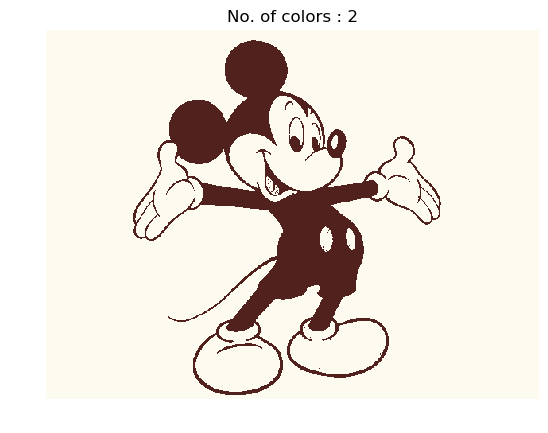

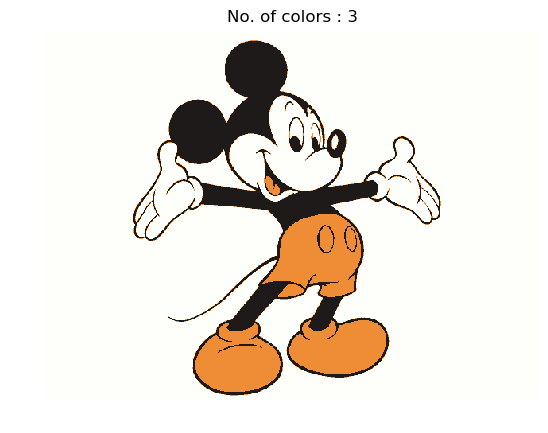

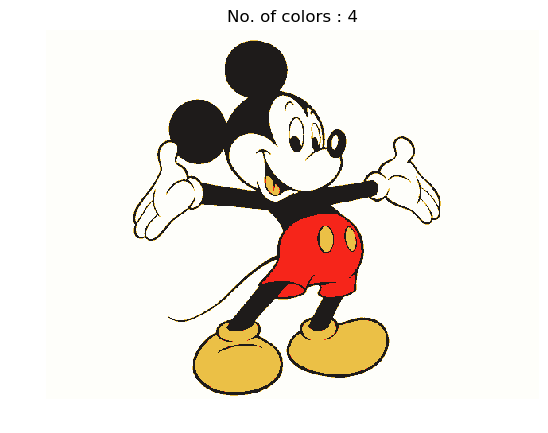

In [10]:
img=cv2.imread("Mickey.jpg")
for i in range(2,5):
    IS=Segmentation(img,i)
    IS.draw_image()